# Week 4

* Introduction to LDI. Funding ratio.
* CIR model to simulate changes in interest rates.
* Liability hedging. Comparison of cash vs bond for hedging.
* Duration matching portfolios.
* PSP/LHP: different weighting strategies.

The main focus of this module is on the design of optimal allocation strategies for investors endowed with long-term liability or consumption objectives, a framework suitable to most institutional investors but also to private investors. It presents the state of the art in asset-liability management (ALM) with a specific emphasis on defining the investor's objectives and constraints, formalizing the risk-return trade-off in terms of final funding ratio and minimizing the opportunity costs of short-term constraints.

We emphasize the liability-driven investing paradigm, which leads to the recognition that investment decisions should not be framed in terms of one all-encompassing reference policy portfolio, but instead in terms of two distinct reference portfolios, namely a liability-hedging portfolio and a performance-seeking portfolio.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns

In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import sys
sys.path.append("../")
import edhec_risk_kit as erk

In [20]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

# 1. Time value of money

We recall from week 1, that is, in general, for given a time frame $(t, t+k)$, with $k>1$, the **compound return** over the time frame is given by:
$$
R_{t,t+k} = (1+R_{t,t+1})(1+R_{t+1,t+2})\cdots(1+R_{t+k-1,t+k}) - 1, 
$$
and if single returns are all the same over time periods, say $R$, then the formula for compound returns simply becomes: 
$$
R_{t,t+k} = (1+R)^{k} - 1.
$$

Therefore, if we suppose that $P_t$ was the price a t time $t$ and $P_{t+k}$ is the time when all returns have been compounded, we know that:
$$
P_{t+k} = P_t(1 + R_{t, t+k}) = 
\begin{cases}
& P_t \; (1+R_{t,t+1})(1+R_{t+1,t+2})\cdots(1+R_{t+k-1,t+k})\;  & \text{if returns are different}, \\
& P_t \; (1+R)^{k} \;  & \text{if all returns are equal to $R$}.
\end{cases}
$$

## 1.1. Present and future value

In general, we say that $P_{t+k}$ is the **future value (FV)** of the amount of money equal to $P_t$. Likewise, we say that 
$P_t$ is the **present value (PV)** of the amount of money $P_{t+k}$ due in the future (at time $t+k$).

For example, $100\$$ invested for one year and earning $5\%$ interest will be worth $105\$$ after one year. 
Therefore, **both $100\$$ paid now and $105\$$ paid exactly one year later have the same value to a recipient who expects $5\%$ 
interest** (assuming that inflation would be zero): that is, $100\$$ (PV) invested for one year at $5\%$ 
interest has a future value (FV) of $105\$$.

Let us consider the case of equal returns $R$ over time. From the equation above we see that to obtain present value PV (i.e., 
the amount that we would have to invest today) we have to **discount** the future value FV (or payment amount) by the interest rate for the period. Hence:
$$
FV = PV(1 + R)^k
\qquad\text{and}\qquad
PV = \frac{FV}{(1 + R)^k}.
$$


## 1.2. Discount rate

The factor
$$
\frac{1}{(1+R)^k}, 
$$
is called the **discount factor**.

**EXAMPLE**: suppose we are giving an option to receive $1000\$$ today and receiving the same amount of $1000\$$ in three years. 
*What we would choose?*

**We should get the money today, of course**. In fact, receiving $1000\$$ today means that the present value is $PV=1000$, and this amount could be invested and become bigger in three years. Suppose we invest it for three year at annual rate of $3\%$. 
The future value of $1000\%$ today will be 
$$
FV = 1000 (1 + 0.03)^3 = 1.092.7\$. 
$$
If we instead decide to get the money in three years, basically the amount $1000\%$ is already our future value. That is, supposing the same interest rate, the present value of $1000\$$ in three years is:
$$
PV = \frac{1000}{(1+0.03)^3} = 915,14\$, 
$$
and this means that today, we would accept less money ($915,14\$ < 1000\$$).


**EXAMPLE**: suppose we are giving an option to receive $1000\$$ today or receiving $1100\$$ in three years. 
*What we would choose now?*

This is more difficult now, because we get $1000\$$ we may end up with an amount of money which is less than $1152$ in three years. 
In fact, if we suppose that our hypotetical investment still guarantee an annual $3\%$ interest rate, it means that the present value of 
$1150\$$ after three years is:
$$
PV = \frac{1150}{(1+0.03)^3} = 1052.41\$.
$$
That is, taking $1150\$$ in three years is equivalent get $1052.41\$$ today, which is an amount larger than $1000\$$. 
**We will then decide to get the money later**.

## 1.3. Cumulative present value (of future cash flows)

The **cumulative present value** (PV) of future cash flows can be calculated by summing the contributions of future values $FV_t$, i.e., the value of cash flow at time $t$. 

Suppose that company A owes to company B a total of $25000\$$ over three years divided in this way: $8000\$$ in the first year, $11000\$$ in the second year, and $6000\$$ in third year. Suppose that company B applies a $5\%$ annual interest rate. 
What is the present value of such **liability**?. 

We know that the present value of an amount of $FV_1 := 8000\$$ in one year is given by $PV_1 = 8000 / (1+0.05)=7619.05\$$. 
Analogously, the present value of an amount of $FV_2 := 11000\$$ in two years is by $PV_2 = 11000 / (1+0.05)^2=9977.33\$$. 
And finally, the present value of an amount of $FV_3 := 6000\$$ in three years is by $PV_3 = 6000 / (1+0.05)^3=5183.03\$$. 

Wrapping up, the present value of the entire liability is given by the sum of single present values of future cashflow, i.e., 
about $PV_1+PV_2+PV_3 = 22779.4\$$.  

In general, if we **denote the future cash flows as the future values**, we have that the present value of 
a **liability** $L$ is:
$$
PV(L) = \sum_{i=1}^N \frac{FV_{t_i}}{(1+R)^{t_i}} := \sum_{i=1}^N B(t_i) L_{t_i}, 
$$
and $L_{t_i}$ denotes the future cash flow at time $t_i$, i.e., the **liability at time $t_i$**, and 
$B(t_i) := 1 / (1+R)^{t_i}$ denotes the **discount rate**.

In [21]:
# Suppose we want to know the PV of 1 dollar paid in 10 years at an annual interest rate of 3%:
PV = erk.discount(10, 0.03)
PV

,0
10,0.744094


In [22]:
# that is, PV = 0.74 cents will be FV = 1 in 10 years (considering r = 3%). In fact:
FV = PV * (1+0.03)**10
FV

,0
10,1.0


Suppose we have two series of liabilities (i.e. series of future cashflows) for the next three years:

In [23]:
L = pd.DataFrame([[8000,11000],[11000,2000],[6000,15000]], index=[1,2,3])
L

,0,1
1,8000,11000
2,11000,2000
3,6000,15000


whose total value to be paid is equal to, respectively:

In [24]:
L.sum()

0    25000
1    28000
dtype: int64

and suppose that the first liability as a annual rate of $5\%$ and the second one a rate of $3\%$. 
The present value of such liabilities is then given by:

In [25]:
r = [0.05, 0.03] 
PV = erk.present_value(L, r)
PV

0    22779.397473
1    26291.928359
dtype: float64

that is, we owe $25000\$$ and $28000\$$ in the next three years (the total value of the liabilities), and their present value 
is about $22779.4\$$ and $26292\$$, respectively. 

This is means that if today our assets had a value equal to these present values, we would have no problem in paying off 
the liabilities (since I know what interest rates are). 
We would have a problem in case today we had less than, for example, $22779.4\$$ because with current interest rates we 
will not be able to pay $25000$ in three years.

# 2. Funding ratio

The funding ratio is therefore a simply ratio between the value of assets I currently hold and the present value of our liability:
$$
FR = \frac{\text{assets values}}{{PV(L)}}.
$$
If the value of my current assets is bigger than $PV(L)$, then $FR >1$ and this means that I have enough funds to pay of my liability in the coming future. In the example above:

In [26]:
asset = [20000, 27332] 
FR = erk.funding_ratio(asset, L, r)
FR

0    0.877986
1    1.039559
dtype: float64

that is, if we currently have $20000\$$, we won't be able to payoff $25000\$$ in three years for the first liability. 
On the other hand, having a present value of $27332\$$ for the second asset will be enough to payoff the second liability of $28000\$$ in three years.

In [27]:
def show_funding_ratio(asset, L, r):
    fr = erk.funding_ratio(asset, L, r)
    print("Funding ratio: {:.3f}".format(float(fr)))
    
    fig, ax = plt.subplots(1,2,figsize=(15,3))
    ax[0].scatter(r, fr)
    ax[0].set_xlabel("rates")
    ax[0].set_ylabel("funding ratio")
    ax[0].set_xlim([0.0, 0.06])
    ax[0].set_ylim([0.70, 1.2])
    ax[0].plot([r,r],[0,fr], color="b", alpha=0.5)
    ax[0].plot([0,r],[fr,fr], color="b", alpha=0.5)
    ax[0].grid()
    
    ax[1].scatter(asset, fr)
    ax[1].set_xlabel("assets")
    ax[1].set_ylabel("funding ratio")
    ax[1].set_xlim([17000, 30000])
    ax[1].set_ylim([0.70, 1.2])
    ax[1].plot([asset,asset],[0,fr], color="b", alpha=0.5)
    ax[1].plot([0,asset],[fr,fr], color="b", alpha=0.5)
    ax[1].grid()

Funding ratio: 0.997


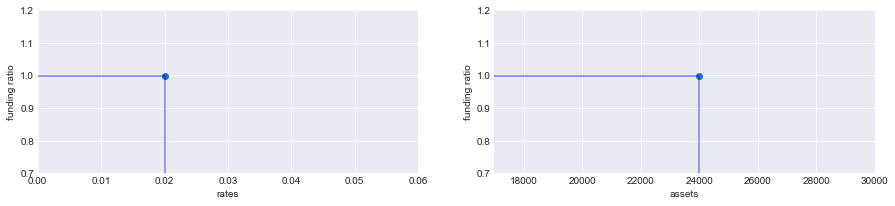

In [28]:
r     = 0.02
asset = 24000
L     = pd.DataFrame([8000, 11000, 6000],index=[1,2,3])

show_funding_ratio(asset, L, r)

# 3. Nominal rate and Effective annual interest rate

Before introducing a stochastic equation modelling the change in interest rates, let us for a second come back to compound returns in order to look at them from another point of view which changes nomenclature. 

## 3.1. Short-rate v.s. Long-Rate (annualized)
Recall that given a fixed return $R$, the compound return after a period of length $t+k$ (starting from $t$) is given by:
$$
R_{t,t+k} = (1+R)^{k} - 1.
$$

For example, suppose that we borrow some money, say $P := 1\$$, during one year at annual interest rate of $r_{ann} := 10\%$. 
Also, suppose that we have to pay back in one solution at the end of the year. This means that the return after one year is $10\%$ and
we have to pay back:
$$
1 + 0.1\cdot 1 = 1.1\$.
$$
Now, suppose that we still borrow $P$ at interest rate $r := 10\%$ but with have to pay in two solutions, i.e., every $6$ months. 
Hence, we get the semi-annual rate $r/2 = 5\%$ which gives a total compound return of 
$$
\left(1 + \frac{r}{2}\right)^2 -1 = 0.1025\$,
$$
and then we have to pay back $1 + 0.1025\cdot 1= 1.1025\$$.
If, in the same case, payments were due every month, we would have:
$$
\left(1 + \frac{r}{12}\right)^{12}-1 = 0.1047\$,
$$
and then we have to pay back $1 + 0.1047\cdot 1= 1.1047\$$.

We can see that due to compounding, **the more payments due over the entire period the larger the total compound return, hence more money have to be paid back**. 

In general, given a **nominal interest rate** $r$ (also called **instantaneous interest rate**) and $N$ **number of periods**, i.e., the number of payments (of the investment, loan, and so on), 
the total return is given by:
$$
R = \left(1 + \frac{r}{N}\right)^N - 1.
$$
Such $R$ is nothing but that the **annualized return** (as we used to call it so far) or the **effective annual interest rate** 
obtained from **discrete compounding**. 

Note that, from formula above, we also have:
$$
r = N((1+R)^{1/N}-1).
$$

In [29]:
# Consider a nominal interest rate of 10% and monthly payments
nominal_rate = 0.1
periods_per_year = 12

# that is, every month, we have the following rates
rets = pd.DataFrame( [nominal_rate/periods_per_year for i in range(10)] )
rets.head(3)

,0
0,0.008333
1,0.008333
2,0.008333


Due to compounding, we have:

In [30]:
ann_ret = erk.annualize_rets(rets, periods_per_year)[0]
ann_ret

0.1047130674412966

In [31]:
R = (1 + nominal_rate / periods_per_year)**periods_per_year - 1
R

0.10471306744129683

Notice that we got, obviously, the same number (and that it does not depend on the number of returns in the dataframe...). 

## 3.2. Continuous compounding
By having the annualized return expressed in the form above, we realize that when $N$ becomes large we have:
$$
\lim_{N\to \infty} \left(1 + \frac{r}{N} \right)^N = e^{r}, 
$$
and then 
$$
R = \lim_{N\to \infty} \left(1 + \frac{r}{N} \right)^N  - 1 \approx e^r - 1
\quad\text{from which}\quad 
r \approx \log{(1 + R)}.
$$
This is the case of continuosly compounded returns. Of course it is a theoretical way of compounding although in some cases it can effectively be used. 

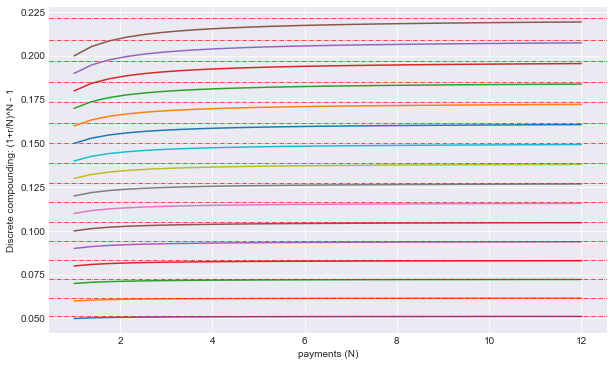

In [32]:
N = np.linspace(1,12,30)
nom_rates = np.arange(0.05,0.2,0.01)
fig, ax = plt.subplots(1,1,figsize=(10,6))
for r in nom_rates:
    ax.plot(N, (1 + r / N)**N - 1)
    ax.axhline(y=np.exp(r) -  1, color="r", linestyle="-.", linewidth=0.7)
    ax.set_ylabel("Discrete compounding: (1+r/N)^N - 1")
    ax.set_xlabel("payments (N)")
plt.grid()

In the plot above, we have plotted the discrete compounding function $\left(1 + \frac{r}{N} \right)^N  - 1$ for different nominal interest rates, from $5\%$ to $20\%$, against the number of discrete payments over the years.

The red lines are instead the continuously compounded return for current nominal interest rates, i.e., $e^r-1$: 
we can see that as soon as the number of payments increase, we have the convergence.

We have these compouding rules in the following methods:

In [33]:
# discrete compounding 
r = 0.1
R_disc = erk.compounding_rate(r, periods_per_year=12)
R_disc

0.10471306744129683

In [34]:
# continuously compounding 
r = 0.1
R_cont = erk.compounding_rate(r)
R_cont

0.10517091807564771

In [35]:
# get the discrete compounded rate above and return back the nominal rate of 0.1 
erk.compounding_rate_inv( R_disc, periods_per_year=12)

0.09999999999999964

In [36]:
# get the continuously compounded rate above and return back the nominal rate of 0.1 
erk.compounding_rate_inv( R_cont ) 

0.10000000000000007

We're introducing these concepts to explore this idea: **what matters is not the value of assets per se, but the value of the assets related to the liabilities**.

# 4. CIR model: simulate changes in interest rates

The **CIR model** (from **Cox, Ingersoll, Ross**) is used to simulate changes in interest rates (returns) and it is an extension of the **Vasicek** model to prevent negative interest rates. It is a type of **one factor model**, or **short-rate model**, 
as it describes interest rate movements as driven by only one source of market risk. 
The model can be used in the valuation of interest rate derivatives. 

The dynamic for interest rates is modelled in the following way:
$$
dr_t = a(b-r_t)dt + \sigma\sqrt{r_t}dW_t,
$$
where, $W_t$ is a Brownian motion (see Week 3) which models the random market risk factor, $b$ is a **(long-term) mean interest rate**, and the difference $b-r_t$ denotes how far away is the current interest rate from the (long-term) mean interest rate. 
Finally, $a$ is the **mean-reversion speed**, or speed of adjustment to the mean, which models **how fast** do we revert to the (long-term) mean interest rate.

The movements of the interest rates then depend on the long-term mean rate ($b$) and on 
how fast the dynamic changes and try to get close to the mean rate (by $a$) after deviations 
(by the noise given by $\sigma\sqrt{r_t}dW_t$). 
Note that the standard deviation factor $\sigma\sqrt{r_t}$ avoids the possibility of negative interest rates for all positive values of $a$ and $b$. Moreover, an interest rate equal to zero is also precluded if $2ab\geq \sigma^2$. 

More generally, when the rate $r_t$ is close to zero, the standard deviation $\sigma\sqrt{r_t}$ also becomes very small, which dampens the effect of the random shock on the rate. Consequently, in this case, the evolution of the rate becomes dominated by the drift factor 
which pushes the rate upwards (towards equilibrium).

## 4.1. Using the CIR model for zero-coupon bond pricing

Under the **no-arbitrage assumption**, a **zero-coupon bond** may be priced using the interest rate process modeled by the CIR model. 
The bond price $P(t,T)$ of a zero-coupon bond with maturity $T$ is exponential affine in the interest rate and is given by:
$$
P(t,T) = A(t,T)e^{-B(t,T)r_t}, 
$$
where
$$
\begin{align}
A(t,T) &:= \left( \frac{ 2h e^{(a+h)\tau/2}  }{ 2h+(a+h)(e^{h\tau}-1) }   \right)^{2ab/\sigma^2}, \\
B(t,T) &:= \frac{ 2(e^{h\tau} - 1)  }{ 2h+(a+h)(e^{h\tau}-1) },  \\
h &:= \sqrt{a^2 + 2\sigma^2}, \\
\tau &:= T - \tau.
\end{align}
$$

In [37]:
def show_cir(n_years=10, n_scenarios=10, a=0.05, b=0.05, sigma=0.04, periods_per_year=12, r0=None):
    rates, zcb_price = erk.simulate_cir(n_years=n_years, n_scenarios=n_scenarios, a=a, b=b, sigma=sigma, periods_per_year=periods_per_year, r0=r0)
    
    fig, ax = plt.subplots(1,2,figsize=(20,5))
    rates.plot(ax=ax[0], grid=True, title="CIR model: interest rates", color="indianred", legend=False)
    zcb_price.plot(ax=ax[1], grid=True, title="CIR model: ZCB price", color="indianred", legend=False)

cir_controls = widgets.interact(show_cir, 
                                n_years = (1, 10, 1), 
                                n_scenarios = (1, 200, 1), 
                                a = (0.005, 1, 0.005), 
                                b = (0.002, 0.15, 0.001), 
                                sigma = (0.001, 0.15, 0.001), 
                                periods_per_year = [12, 52, 252], 
                                r0 = (0.002, 0.30, 0.01)
                               )

interactive(children=(IntSlider(value=10, description='n_years', max=10, min=1), IntSlider(value=10, descripti…

We can see that although there's volatility, at the end we always converge to price equal to one.

# 5. Liability hedging 

The motivation behind liability hedging is that for investors endowed with liabilities, the main risk is an unexpected increase in the value of the liabilities **relative to the assets**.

To hedge this risk, investors may hold **liability matching portfolios**, which can be constructed via cash-flow matching or factor exposure matching approaches (by matching the duration).

Since we have a model to simulate interest rates and changes in the price of **zero-coupon bonds** 
we can see what happens to the hedging strategy **in case we use zero-coupon bonds as hedge instead of cash**. 

We have seen that changes in interest rates has enormous impact on the liabilities we may have for the next future, and therefore, on the funding ratios. Hence it makes sense to make sure that we know how the portfolio is going to behave as interest rates 
fluctuate over time.

The problem is: **we have some liability to satisfy in the future**, and as long as interest rates changes over times, we have to make sure to meet such a liability by using **a hedging strategy so that an increase in value of our asset will be enough**. 

## 5.1. Example of liability hedging comparison using a zero-coupon bond vs cash

Suppose:

In [38]:
asset_0  = 0.75
tot_liab = 1

mean_rate = 0.03
n_years   = 10
n_scenarios = 10
periods_per_year = 12

that we have an initial amount of $0.75$ million dollars (**asset_0**) and that we have a total liability of $1$ million dollars (**tot_liab**) due in $10$ years. Also, suppose that the mean rate (the nominal rate of this liability) is $3\%$. 

### 5.1.1. Simulate interest rates and zero-coupon bond prices

Let us simulate interest rates (starting from the mean rate) for the next 10 years:

In [39]:
rates, zcb_price = erk.simulate_cir(n_years=n_years, n_scenarios=n_scenarios, 
                                    a=0.05, b=mean_rate, sigma=0.08, periods_per_year=periods_per_year)
rates.head()

,0,1,2,3,4,5,6,7,8,9
0,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
1,0.034211,0.022483,0.027968,0.030267,0.030565,0.029474,0.022067,0.030116,0.027202,0.028666
2,0.031616,0.015005,0.025143,0.026200,0.032369,0.021894,0.021772,0.022202,0.031012,0.031253
3,0.029221,0.014233,0.020597,0.028121,0.032264,0.025785,0.026365,0.025280,0.025318,0.026206
4,0.026568,0.014383,0.021487,0.028347,0.029273,0.026166,0.027162,0.035067,0.029266,0.031390


Furthermore, let us suppose that **our liabilities over time are given by the zero-coupon bond prices** that we have just simulated. 
This is going to be simply a trick to have changes in the liability according to the change in interest rates:

In [40]:
L = zcb_price
L.head()

,0,1,2,3,4,5,6,7,8,9
0,0.758469,0.758469,0.758469,0.758469,0.758469,0.758469,0.758469,0.758469,0.758469,0.758469
1,0.760034,0.760034,0.760034,0.760034,0.760034,0.760034,0.760034,0.760034,0.760034,0.760034
2,0.739563,0.802834,0.772506,0.760185,0.758603,0.764410,0.805192,0.760988,0.776664,0.768741
3,0.754665,0.847652,0.789448,0.783646,0.750734,0.807589,0.808283,0.805852,0.757837,0.756569
4,0.768900,0.853524,0.816357,0.774774,0.752911,0.787419,0.784257,0.790182,0.789977,0.785122


### 5.1.2.  Hedging by buying zero-coupon bonds

Our task is meet the liability in 10 years. **The idea is to invest our current asset in a zero-coupon bond**. 

We know what is the price of a zero-coupon bond that matures in 10 years. Since, by definition, **such bond does not pay coupons and simply returns at maturity the face value plus the given interest**, its price is simply given by the present value of this last amount:

In [41]:
# price of a zcb with maturity 10 years and rate equal to the mean rate
zcb = pd.DataFrame(data=[tot_liab], index=[n_years])
zcb_price_0 = erk.present_value( zcb, mean_rate )
zcb_price_0

0    0.744094
dtype: float64

i.e., a zero-coupon bond paying off $1$ million dollars plus an interest of $3\%$ in 10 years is worth about $0.74$ million dollars today. 

Hence, **suppose we invest into such zero-coupon bond**. 
First of all, given our initial asset, we can buy today the following number of bonds:

In [42]:
n_bonds = float(asset_0 / zcb_price_0)
n_bonds

1.0079372845080916

so basically, $1$ such bond, and since we know how interest rates will change over time, 
we also know **the future value of our asset that have been invested in this zero-coupon bond**. 
In fact, we know how many bonds we buy and how the price will change. Then:

In [43]:
asset_value_of_zcb = n_bonds * zcb_price
asset_value_of_zcb.head()

,0,1,2,3,4,5,6,7,8,9
0,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489
1,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066
2,0.745433,0.809206,0.778638,0.766219,0.764625,0.770477,0.811583,0.767028,0.782829,0.774842
3,0.760655,0.854380,0.795714,0.789866,0.756693,0.813999,0.814699,0.812248,0.763852,0.762574
4,0.775003,0.860299,0.822837,0.780923,0.758887,0.793669,0.790482,0.796454,0.796247,0.791354


### 5.1.3. Hedging by investing in cash 
Suppose now that instead of putting our money in zero-coupon bonds **we just put our money in cash**. 
What is the future value of our asset then? 

Since interest changes over time, the future value of our asset is simply obtained by compounding with respect to the interest rates, i.e.,
$$
\text{asset}_{10y} = \text{asset}_0 (1+r_{0,1})(1+r_{1,2})\cdots.
$$

In [44]:
# we have to divide by periods_per_year since rates are returned as annual rates
asset_value_in_cash = asset_0 * (1 + rates/periods_per_year).cumprod()
asset_value_in_cash.head()

,0,1,2,3,4,5,6,7,8,9
0,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875
1,0.754019,0.753284,0.753627,0.753771,0.753790,0.753722,0.753258,0.753762,0.753579,0.753671
2,0.756005,0.754226,0.755206,0.755417,0.755823,0.755097,0.754624,0.755157,0.755527,0.755634
3,0.757846,0.755120,0.756503,0.757187,0.757856,0.756719,0.756282,0.756747,0.757121,0.757284
4,0.759524,0.756025,0.757857,0.758976,0.759704,0.758369,0.757994,0.758959,0.758967,0.759265


### 5.1.4. Result: comparing the two investments

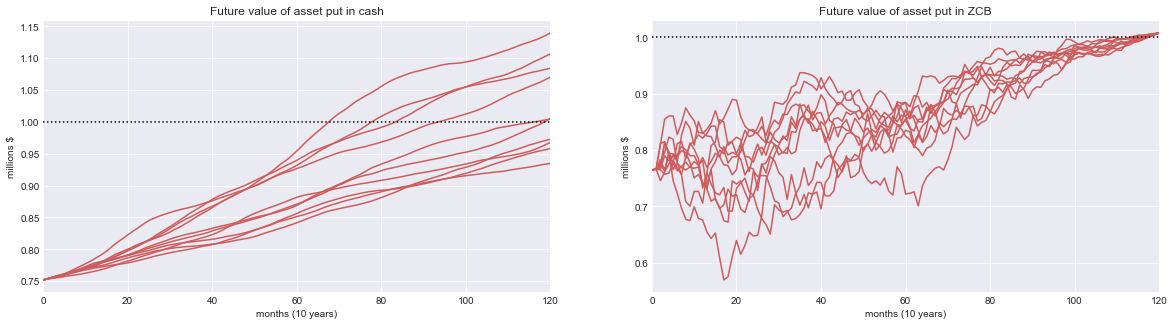

In [45]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

asset_value_in_cash.plot(ax=ax[0], grid=True, legend=False, color="indianred", title="Future value of asset put in cash")
asset_value_of_zcb.plot(ax=ax[1], grid=True, legend=False, color="indianred", title="Future value of asset put in ZCB")
ax[0].axhline(y=1.0, linestyle=":", color="black")
ax[1].axhline(y=1.0, linestyle=":", color="black")
ax[0].set_ylabel("millions $")
ax[1].set_ylabel("millions $")
if periods_per_year == 12:
    ax[0].set_xlabel("months ({:.0f} years)".format((len(asset_value_in_cash.index)-1)/periods_per_year))
    ax[1].set_xlabel("months ({:.0f} years)".format((len(asset_value_in_cash.index)-1)/periods_per_year))

plt.show()

We see that, although the increase in value in the left-hand side plot is smoother, there have been **some scenarios in which the investment of our asset value in cash did not provide the $1$ million dollars of liability** that we have to pay.

On the other hand, notheless the oscillation in value, the investment in **the zero-coupon bond always guarantee the money we need at the maturity**.

Let us look at the **funding ratios** of the two investments, that is, the ratio between the asset value and the liability:

In [46]:
fr_cash = asset_value_in_cash / L
fr_zcb  = asset_value_of_zcb  / L

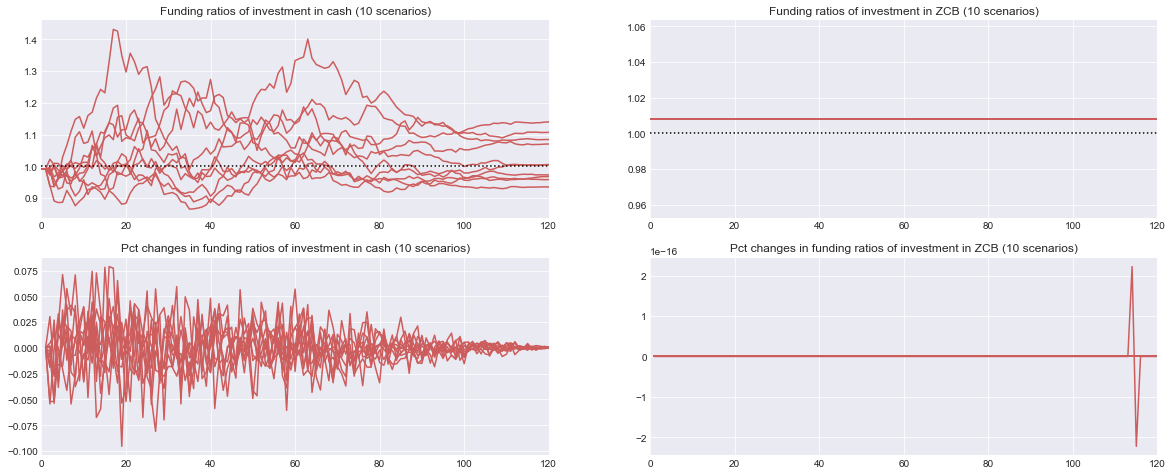

In [47]:
fig, ax = plt.subplots(2,2,figsize=(20,8))

fr_cash.plot(ax=ax[0,0], grid=True, legend=False, color="indianred", 
             title="Funding ratios of investment in cash ({} scenarios)".format(n_scenarios))
fr_zcb.plot(ax=ax[0,1], grid=True, legend=False, color="indianred", 
            title="Funding ratios of investment in ZCB ({} scenarios)".format(n_scenarios))

ax[0,0].axhline(y=1.0, linestyle=":", color="black")
ax[0,1].axhline(y=1.0, linestyle=":", color="black")

fr_cash.pct_change().plot(ax=ax[1,0], grid=True, legend=False, color="indianred",
                          title="Pct changes in funding ratios of investment in cash ({} scenarios)".format(n_scenarios))
fr_zcb.pct_change().plot(ax=ax[1,1], grid=True, legend=False, color="indianred", 
                         title="Pct changes in funding ratios of investment in ZCB ({} scenarios)".format(n_scenarios))
plt.show()

Let us now look at the **terminal** funding ratios, i.e., the funding ratio when maturity is met. Since we wan to plot an histogram for the distribution of the funding ratios, we repeat all the steps above for a large number of scenarios:

In [48]:
# simulate more scenarios
n_scenarios = 5000
rates, zcb_price = erk.simulate_cir(n_years=n_years, n_scenarios=n_scenarios, a=0.05, 
                                    b=mean_rate, sigma=0.08, periods_per_year=periods_per_year)
# assign liabilities
L = zcb_price
# ZCB investment:
zcb = pd.DataFrame(data=[tot_liab], index=[n_years])
zcb_price_0 = erk.present_value( zcb, mean_rate )
n_bonds = float(asset_0 / zcb_price_0)
asset_value_of_zcb = n_bonds * zcb_price
# Cash investment 
asset_value_in_cash = asset_0 * (1 + rates/periods_per_year).cumprod()

In [49]:
# terminal funding ratios
terminal_fr_zcb  = asset_value_of_zcb.iloc[-1]  / L.iloc[-1]
terminal_fr_cash = asset_value_in_cash.iloc[-1] / L.iloc[-1]

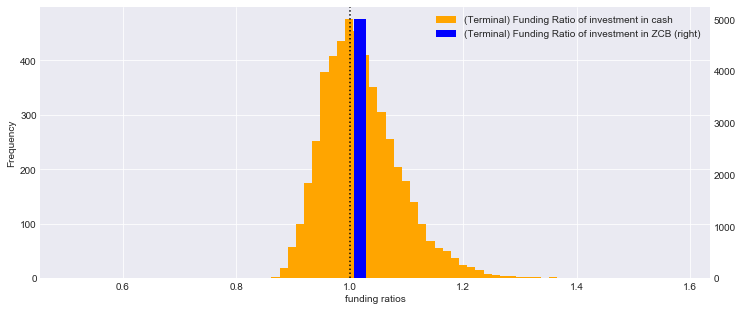

In [50]:
ax = terminal_fr_cash.plot.hist(label="(Terminal) Funding Ratio of investment in cash", bins=50, figsize=(12,5), color="orange", legend=True)
terminal_fr_zcb.plot.hist(ax=ax, grid=True, label="(Terminal) Funding Ratio of investment in ZCB", bins=50, legend=True, color="blue", secondary_y=True)
ax.axvline(x=1.0, linestyle=":", color="k")
ax.set_xlabel("funding ratios")
plt.show()

This shows that although there are many scenarios in which we can do very well with cash, i.e., our investment in cash will gain enough value to pay the liability (funding ratios larger than $1$), **there are also many scenarios for which the funding ratio will be less than $1$**. 
On the other hand, the terminal funding ratio for the investment of zero-coupon bond will be always larger than or equal to $1$.

## 5.2. Coupon-bearing bonds 

Differently from a zero-coupon bond which have only one cash flow consisting of the **principal** (**face value**, or **par value**) 
invested plus the interest accrued, 
a "regular" **coupon-bearing bond** pays coupons at regular intervals during the entire maturity. The last cash flow consists of the last coupon plus the principal:
$$
\text{Bond price}= PV = \sum_{i=1}^N \left(\frac{C_{t_i}}{(1+\text{YTM})^{t_i}}\right)  +  \frac{F}{(1+\text{YTM})^{t_N}} 
= C\left(\frac{1-(1+\text{YTM})^{-t_N}}{\text{YTM}}\right) +  \frac{F}{(1+\text{YTM})^{t_N}},
$$ 
where $N$ is the number of coupons paid, 
$C_{t_i}$ is the coupon paid at time $t_i$ (they are all the same), $F$ is the face value of the bond, 
and $\text{YTM}$ is the **yield to maturity**, that is the yield obtained in case an investor holds the bond until it matures (the yield to maturity is expressed as a annual rate).

For example, let us see the cash flow generated by a bond:

In [57]:
principal        = 100 
maturity         = 3
ytm              = 0.05
coupon_rate      = 0.03 
coupons_per_year = 2

In [58]:
cf = erk.bond_cash_flows(principal=principal, maturity=maturity, coupon_rate=coupon_rate, coupons_per_year=coupons_per_year)
cf

,0
1,1.5
2,1.5
3,1.5
4,1.5
5,1.5
6,101.5


Since the bond pays two coupons per year, the yield of each payment is $0.015$ (half of the coupon rate), and there a total of $6$ payments where the last one (at maturity) consists of the face value plus the last coupon. 

Look at the price of such bond:

In [59]:
bond_price = erk.bond_price(principal=principal, maturity=maturity, coupon_rate=coupon_rate, coupons_per_year=coupons_per_year, ytm=ytm)
bond_price

94.49187463842023

In [60]:
# total sum paid by the bond if held until maturity 
tot_bond_paym = cf.sum()[0]
tot_bond_paym

109.0

In [61]:
# gain (in money) of the investment in such bond
gain = -bond_price + tot_bond_paym
gain

14.508125361579772

Basically, the $\text{YTM}=0.05$ is **approximately** given by the annual rate which (after compounding) returns a total amount equal 
to **tot_bond_paym** by having investing an initial amount equal to the bond price **bond_price**, i.e, 

In [62]:
# tot_bond_paym = bond_price * (1 + r)**maturity, hence 
r = (tot_bond_paym / bond_price )**(1/maturity) - 1
r

0.048762968814507035

## 5.3. Relation between yield to maturity and bond price

When the price of the bond is less than its face value (par value), the bond is selling **at a discount**. This happens **when the ytm is larger than the coupon rate**.

Conversely, if the price of the bond is greater than its face value, the bond is selling **at a premium**. This happens **when the ytm is smaller than the coupon rate**.

If the price of the bond is equal to its face value, the bond is selling **at par**. This happens **when the ytm is equal to the coupon rate**.

Therefore, **the ytm and the bond price is inversely correlated**:

In [63]:
# bond selling at discount: bond price smaller than face value
erk.bond_price(principal=100, maturity=3, coupon_rate=0.03, coupons_per_year=2, ytm=0.05)

94.49187463842023

In [64]:
# bond selling at premium: bond price larger than face value
erk.bond_price(principal=100, maturity=3, coupon_rate=0.03, coupons_per_year=2, ytm=0.02)

102.89773823728964

In [65]:
# bond selling at par: bond price equal to face value
erk.bond_price(principal=100, maturity=3, coupon_rate=0.03, coupons_per_year=2, ytm=0.03)

100.00000000000007

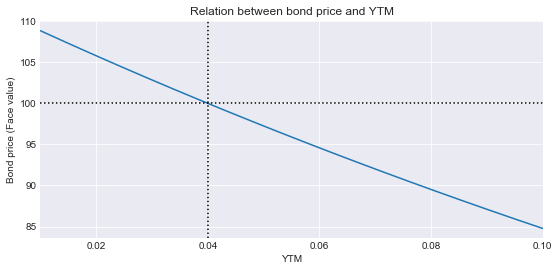

In [66]:
coupon_rate = 0.04
principal = 100
ytm = np.linspace(0.01, 0.10, 20)
bond_prices = [erk.bond_price(maturity=3, principal=principal, coupon_rate=coupon_rate, coupons_per_year=2, ytm=r) for r in ytm]

ax = pd.DataFrame(bond_prices, index=ytm).plot(grid=True, title="Relation between bond price and YTM", figsize=(9,4), legend=False)
ax.axvline(x=coupon_rate, linestyle=":", color="black")
ax.axhline(y=principal, linestyle=":", color="black")
ax.set_xlabel("YTM")
ax.set_ylabel("Bond price (Face value)")
plt.show()

## 5.4. Changes in price 
Note that the yield to maturity is a variable that changes over time. 
In fact, it is an interest rate which changes and, in turn, would change the price of the bond. 

Let us see how the price of a coupon-bearing bond changes as interest rates (i.e., yields to maturity) change. 
First of all, we simulate the interest rates usig the CIR model:

In [67]:
n_years          = 10
n_scenarios      = 10
b                = 0.03
periods_per_year = 2

rates, _ = erk.simulate_cir(n_years=n_years, n_scenarios=n_scenarios, a=0.02, b=b, sigma=0.02, periods_per_year=periods_per_year)
rates.tail()

,0,1,2,3,4,5,6,7,8,9
16,0.038394,0.035320,0.026955,0.022484,0.031795,0.031242,0.013168,0.017003,0.019618,0.035733
17,0.042844,0.036389,0.030671,0.022950,0.031787,0.034632,0.012011,0.022398,0.017859,0.034948
18,0.046545,0.033713,0.031262,0.021082,0.030895,0.035050,0.012582,0.023251,0.018825,0.037626
19,0.046771,0.033851,0.027661,0.019163,0.028214,0.032130,0.011997,0.023615,0.017421,0.039543
20,0.046620,0.029667,0.026727,0.018825,0.029080,0.035314,0.010918,0.022686,0.018541,0.040631


In [68]:
# bond features
principal        = 100
maturity         = n_years
coupon_rate      = 0.04
coupons_per_year = periods_per_year

bond_prices = erk.bond_price(principal=principal, maturity=maturity, coupon_rate=coupon_rate, 
                             coupons_per_year=coupons_per_year, ytm=rates) 

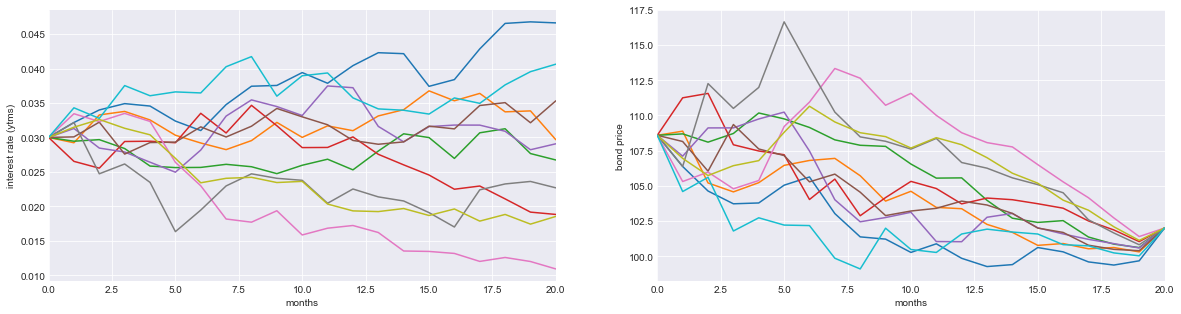

In [69]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
rates.plot(ax=ax[0], grid=True, legend=False) 
bond_prices.plot(ax=ax[1], grid=True, legend=False)
ax[0].set_xlabel("months")
ax[0].set_ylabel("interest rate (ytms)")
ax[1].set_xlabel("months")
ax[1].set_ylabel("bond price")
plt.show()

On the left, we see how interest rates changes over time, and on the right, we see how, in turn, the bond price changes as well.
Also notice that, the price of the bonds at maturity is the same in all scenarios as it is given by the principal plus the coupon-interest. 

### 5.4.1. Total return of a coupon-bearing bond

There is a curious thing to notice. **What are the total returns of these bonds?** 
If we simply compute the return by looking at the changes in prices of the bond we would get something weird:

In [70]:
# computing return by percentage changes in price
bond_rets = bond_prices.pct_change().dropna()
# and annualize the returns
erk.annualize_rets(bond_rets, periods_per_year=periods_per_year)

0   -0.006236
1   -0.006236
2   -0.006236
3   -0.006236
4   -0.006236
5   -0.006236
6   -0.006236
7   -0.006236
8   -0.006236
9   -0.006236
dtype: float64

We get the **same** negative return for all bonds. That is because we are not computing the returns correctly because **we are not taking into account the paid coupons** (note that the fact that returns are negative is simply due to the coupon rate ($0.04$) which is larger than the mean interest rate $b$ ($0.03$)). 

In fact, differently from stocks, **a bond is paying a coupon during its life**. Look inside the following method to see 
how to compute the total return in the right way by taking into consideration the coupons:

In [71]:
bond_rets = erk.bond_returns(principal=principal, bond_prices=bond_prices, coupon_rate=coupon_rate, 
                             coupons_per_year=coupons_per_year, periods_per_year=periods_per_year)
erk.annualize_rets(bond_rets, periods_per_year=periods_per_year)

0    0.033215
1    0.032485
2    0.031788
3    0.032038
4    0.032368
5    0.032351
6    0.031186
7    0.031156
8    0.031522
9    0.033296
dtype: float64

These are now the correctly computed total returns of the bonds 
and note that **such returns are close to the mean rate $b$ ($0.03$)**. 

In the case of the bond price with a fixed interest rate, say, the today bond price, the today total return is then given by:

In [72]:
# choose a fixed ytm
ytm = 0.035
b_price = erk.bond_price(principal=principal, maturity=maturity, coupon_rate=coupon_rate, coupons_per_year=coupons_per_year, ytm=ytm) 

b_ret = erk.bond_returns(principal=principal, bond_prices=b_price, coupon_rate=coupon_rate, 
                         coupons_per_year=coupons_per_year, periods_per_year=periods_per_year, maturity=maturity)

print("Bond price:  {:.6f}".format(b_price))
print("Bond return: {:.6f}".format(b_ret))

Bond price:  104.188220
Bond return: 0.029985


where, again, notice that the return is approximately equal to the YTM.

## 5.5. Macaulay Duration 

The **Macaulay duration** is the **weighted average maturity of cash flows**. Suppose the case of a bond. We have a set 
of fixed cash flows (the coupon payments and the last payment given by the principal) whose total present value is given by
$$
PV = \sum _{i=1}^{N} PV_{i}.
$$
Hence, the Macaulay duration is defined as
$$
\text{MacD} 
:= \frac{ \sum_{i=1}^N t_i PV_i}{ \sum _{i=1}^{N} PV_{i} } 
= \frac{ \sum_{i=1}^N t_i PV_i}{PV} 
= \sum_{i=1}^N w_i t_i
\quad\text{with}\quad
w_i := \frac{PV_i}{PV}, 
$$
where $PV_{i}$ is the present value of the cash flow paid at time $t_i$. 
Note that **the Macaulay duration of a zero-coupon bond is equal to the maturity** as such a bond does not pay regular coupons 
but only one single payment at maturity.

In [73]:
principal        = 1000
maturity         = 3
ytm              = 0.06
coupon_rate      = 0.06
coupons_per_year = 2

In [74]:
cf = erk.bond_cash_flows(principal=principal, maturity=maturity, coupon_rate=coupon_rate, coupons_per_year=coupons_per_year)
cf

,0
1,30.0
2,30.0
3,30.0
4,30.0
5,30.0
6,1030.0


In [75]:
# the discount rate is the YTM divided by the coupons_per_year
macd = erk.mac_duration(cf, discount_rate=ytm/coupons_per_year) 
macd = macd / coupons_per_year
macd

2.789853593597267

that is, the duration of the bond is about $2.79$ years versus the real maturity of $3$ years. **Note that we have divided by the number of coupons per year** because the returned duration was computed with dates from 1 to 6, hence it was about $5.57$ 
(this is the duration expressed in the number of total *periods*). 

Another way to compute the duration would be to **normalize the cash flows dates**:

In [76]:
cf = erk.bond_cash_flows(principal=principal, maturity=maturity, coupon_rate=coupon_rate, coupons_per_year=coupons_per_year)
cf.index = cf.index / coupons_per_year
cf

,0
0.5,30.0
1.0,30.0
1.5,30.0
2.0,30.0
2.5,30.0
3.0,1030.0


In [77]:
# and now the discount rate is simply the YTM
erk.mac_duration(cf, discount_rate=ytm)

2.7901469374492027

and note that in this case we use **only the YTM as discount rate**.

The interpretation is simply that **since the bond is paying coupons during its life, the time waited to get back the money is, effectively, less than the maturity**, just because we already receive some money during the life of the bond.

Let us verify that the duration of a zero-coupon bond is equal to the maturity, no matters the interest rate:

In [78]:
# ZCB: only one flux at maturity
maturity = 3
cf = pd.DataFrame(data=[100], index=[maturity])
macd = erk.mac_duration(cf, discount_rate=0.05) # it does not matter the rate here
macd

3.0

# 6. Liability Driven Investing (LDI)

## 6.1. Duration matching portfolios
What we want to see is how to **construct a portfolio of bonds that has the same duration of the duration 
of a liability** that we have for the future. Suppose we currently have an asset whose value is:

In [88]:
asset_value = 130000

Now, suppose that we have some liabilities consisting of a set of cash flows that we have to pay in the future. 
We have at our disposal some bonds we can invest in. 
The objective is to assign weights to the portfolio consisting of these bonds so that the **duration of the portfolio is equal to the duration of the liabilities**.

In [79]:
interest_rate = 0.04

In [80]:
L = pd.DataFrame([100000, 100000], index=[10,12])
L

,0
10,100000
12,100000


In [81]:
macd_liab = erk.mac_duration(L, discount_rate=interest_rate)
print("Liability duration: {:.3f} years".format(macd_liab))

Liability duration: 10.961 years


In the example, we have two equal payments in $10$ and $12$ years, respectively, 
and the **duration of this liability is about $10.96$ years**.
Note that such liability is equivalent to a flux of cash flow, from year $1$ to year $12$, 
all equal to $0$ except for years $10$ and $12$ corresponding to $1$ coupon payment per year.

Now, if we could buy a zero-coupon bond paying back the liability with a duration of about $10.96$ years, 
that would be great since we know that we would have enough money to meet the liability. 

On the other hand, suppose that such bond is diffcult to find. 
It is much easier to find a single regular coupon-bearing bonds: 
let us assume that, in the market, **there are only 10-years and 20-years bonds** we can invest in:

In [82]:
principal = 1000

# we assume a flat yield curve, i.e., the YTM of the short and long bond are equal (equal to the interest rate defined above)
maturity_short         = 10
coupon_rate_short      = 0.05 
coupons_per_year_short = 1
ytm_short              = interest_rate

maturity_long         = 20
coupon_rate_long      = 0.05 
coupons_per_year_long = 1
ytm_long              = interest_rate

The first thing to do would be to look at the duration of such bonds:

In [83]:
# we firstly get the cashflows of the bonds
cf_short = erk.bond_cash_flows(principal=principal, maturity=maturity_short, 
                               coupon_rate=coupon_rate_short, coupons_per_year=coupons_per_year_short)
cf_long  = erk.bond_cash_flows(principal=principal, maturity=maturity_long, 
                               coupon_rate=coupon_rate_long, coupons_per_year=coupons_per_year_long)

In [84]:
macd_short = erk.mac_duration(cf_short, discount_rate=ytm_short /coupons_per_year_short) /coupons_per_year_short
macd_long  = erk.mac_duration(cf_long,  discount_rate=ytm_long  /coupons_per_year_long)  /coupons_per_year_long
print("(Short) bond duration: {:.3f} years".format(macd_short))
print("(Long) bond duration:  {:.3f} years".format(macd_long))

(Short) bond duration: 8.191 years
(Long) bond duration:  13.545 years


Right. Now, we want to know what are **the fractions of investment to put into the short and long bond** in order to have a 
portfolio (consisting of these two bonds) having an **overall duration equal to the duration of the liability** ($10.91$ years):
$$
w\;d_s + (1-w)\; d_\ell = d_{liab}
\quad\Longrightarrow\quad
w = \frac{d_{liab} - d_\ell}{d_s - d_\ell}.
$$
In our case, we get:

In [85]:
# weight in the short bond
w_short = (macd_liab - macd_long) / (macd_short - macd_long)
w_short

0.4826309206947901

that is, we should put $48\%$ of our money in the short bond and about $52\%$ into the long bond. 
Let us make sure that our portfolio would have the right duration (i.e., the duration of the liability). 
To compute the duration, we first need to know the prices of the bonds we are going to buy and then the cashflow of the portfolio.

In [86]:
# Compute the bonds prices
bondprice_short = erk.bond_price(principal=principal, maturity=maturity_short, coupon_rate=coupon_rate_short, 
                                 coupons_per_year=coupons_per_year_short, ytm=ytm_short)
bondprice_long  = erk.bond_price(principal=principal, maturity=maturity_long, coupon_rate=coupon_rate_long, 
                                 coupons_per_year=coupons_per_year_long, ytm=ytm_long)
print("(Short) Bond price: {:.2f}".format(bondprice_short))
print("(Long) Bond price: {:.2f}".format(bondprice_long))

(Short) Bond price: 1081.11
(Long) Bond price: 1135.90


The cashflows would be:

In [89]:
# the number of short bond that we can buy (analogously for the long bond):
# n_bond_short * bondprice_short = w_short * asset_value ==>  n_bond_short = w_short * asset_value / bondprice_short 
portfolio_cf_short = w_short     * asset_value / bondprice_short * cf_short
portfolio_cf_long  = (1-w_short) * asset_value / bondprice_long  * cf_long

# cashflows of the short and long bond
portfolio_cf = pd.concat([portfolio_cf_short, portfolio_cf_long], axis=1).fillna(0)        
portfolio_cf.columns = ["CF short", "CF long"]

# adding the cashflow of the portfolio
portfolio_cf["CF portfolio"] = portfolio_cf.sum(axis=1)
portfolio_cf

,CF short,CF long,CF portfolio
1,2901.743586,2960.550536,5862.294122
2,2901.743586,2960.550536,5862.294122
3,2901.743586,2960.550536,5862.294122
4,2901.743586,2960.550536,5862.294122
5,2901.743586,2960.550536,5862.294122
6,2901.743586,2960.550536,5862.294122
7,2901.743586,2960.550536,5862.294122
8,2901.743586,2960.550536,5862.294122
9,2901.743586,2960.550536,5862.294122
10,60936.615315,2960.550536,63897.165851


These are the cashflows from the short and long bond (in the first and second columns, respectively) and the overall 
cashflow of the portfolio in the third column. Let us verify that the duration of the portfolio matches the duration of the liability:

In [90]:
# make the portfolio cf a dataframe
portfolio_cf = pd.DataFrame(portfolio_cf["CF portfolio"])
portfolio_cf.columns = [0]

macd_portfolio = erk.mac_duration(portfolio_cf, discount_rate=interest_rate)
macd_portfolio

10.960799385088391

Fine. We can see what the **funding ratio** of our portfolio is. 
To this end, let us modify, just here, not in the kit, the method for computing the fundin ratio. Since we invest money in a bond, we should do the ratio between the present value of the liability **and** the present value 
of the bond (since it is also a series of cashflows):

In [91]:
def funding_ratio(asset_value, liabilities, r):
    '''
    Computes the funding ratio between the value of holding assets and the present 
    value of the liabilities given an interest rate r (or a list of)
    '''
    return erk.present_value(asset_value, r) / erk.present_value(liabilities, r)   

and let us also plot the fundin ratios in in case we would have invested all of our money in the short bond or in the long bond:

In [92]:
# remove weights from series of cashflows 
short_bond_asset = asset_value / bondprice_short * cf_short
long_bond_asset  = asset_value / bondprice_long * cf_long

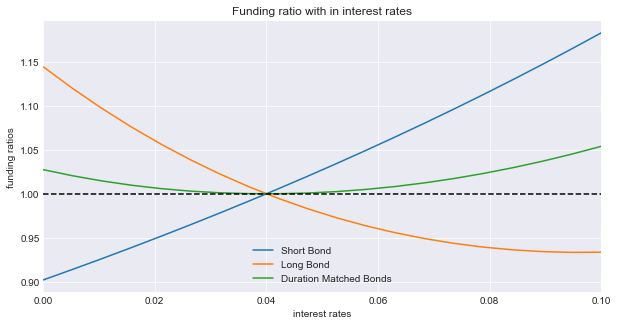

In [94]:
# interest rates
rates = np.linspace(0, 0.1, 20)

fun_ratios = pd.DataFrame(
    {
        "Short Bond": [funding_ratio(short_bond_asset, L, r)[0] for r in rates],
        "Long Bond": [funding_ratio(long_bond_asset, L, r)[0] for r in rates],
        "Duration Matched Bonds": [funding_ratio(portfolio_cf, L, r)[0] for r in rates]
    }, index = rates
)

ax = fun_ratios.plot(grid=True, figsize=(10,5), title="Funding ratio with in interest rates")
ax.set_xlabel("interest rates")
ax.set_ylabel("funding ratios")
ax.axhline(y=1, linestyle="--", c="k")
plt.show()

We've seen that if you have the assets on hand, you can secure future liabilities by matching the duration of your liabilities with the durations of your assets to immunize yourself against level shifts in the yield curve. In practice, you might also want to protect against changes in the slope and curvature of the yield curve by using convexity hedging, but duration hedging is a simple but essential step towards ensuring that you will have the money to meet your liabilities when interest rates fluctuate.


We observe that as long as interest rates are smaller than the liability rate, investing all of our money in the long bond would guarantee a funding ratio larger than $1$. When they start to increase, we see that we would not have enough funding to meet the liability. 

The opposite occurs in the case of investing all of our money in the short bond. 

On the other hand, we see that **investing in the matching duration portfolio guarantees a funding ratio larger than (or equal to) 
$1$ no matter how interest rates change**.

### 6.1.1. Example with not matching bonds

Suppose again to build a portfolio whose duration has to match the duration of some liabilities, but let us assume that now **the bonds do not pay $1$ coupon per year**. This would change the things a little bit.

In [95]:
def duration_match_weight(d1, d2, d_liab):
    w1 = (d_liab - d2) / (d1 - d2)
    w2 = 1 - w1
    return w1, w2

Suppose to have the following flat interest rate and liabilities:

In [96]:
flat_yield = 0.05

In [97]:
L = pd.DataFrame([100000, 200000, 300000], index=[3,5,10])
L

,0
3,100000
5,200000
10,300000


In [98]:
macd_L = erk.mac_duration(L, discount_rate=flat_yield)
macd_L

6.750917852744651

Our bonds are:

In [99]:
principal = 1000

maturity_b1         = 15
coupon_rate_b1      = 0.05
ytm_b1              = flat_yield
coupons_per_year_b1 = 2

maturity_b2         = 5
coupon_rate_b2      = 0.06
ytm_b2              = flat_yield
coupons_per_year_b2 = 4

Let us compute the cash flows and **normalize the dates**:

In [100]:
cf_b1 = erk.bond_cash_flows(principal=principal, maturity=maturity_b1, coupon_rate=coupon_rate_b1, coupons_per_year=coupons_per_year_b1)
cf_b2 = erk.bond_cash_flows(principal=principal, maturity=maturity_b2, coupon_rate=coupon_rate_b2, coupons_per_year=coupons_per_year_b2)
cf_b1.index = cf_b1.index / coupons_per_year_b1
cf_b2.index = cf_b2.index / coupons_per_year_b2

The durations of the bonds are, respectively:

In [101]:
macd_b1 = erk.mac_duration(cf_b1,discount_rate=ytm_b1) 
macd_b1

10.742333260961376

In [102]:
macd_b2 = erk.mac_duration(cf_b2,discount_rate=ytm_b2)
macd_b2

4.374877036571144

and the weights to allocate are:

In [103]:
w_b1, w_b2 = duration_match_weight(macd_b1, macd_b2, macd_L)
w_b1, w_b2

(0.3731538517802758, 0.6268461482197242)

Ok. **Let us verify that the duration of a portfolio constructed with these weights would match the duration of the liability**. 
Compute the bond price:

In [104]:
bprice_b1 = erk.bond_price(principal=principal, maturity=maturity_b1, coupon_rate=coupon_rate_b1, 
                           coupons_per_year=coupons_per_year_b1, ytm=ytm_b1)
bprice_b2 = erk.bond_price(principal=principal, maturity=maturity_b2, coupon_rate=coupon_rate_b2, 
                           coupons_per_year=coupons_per_year_b2, ytm=ytm_b2)
(bprice_b1, bprice_b2) 

(1000.0000000000019, 1043.9982903355647)

In [105]:
asset_value = 100000 # does not matter this value

In [106]:
# the number of short bond that we can buy (analogously for the long bond):
# n_bond_short * bondprice_short = w_short * asset_value ==>  n_bond_short = w_short * asset_value / bondprice_short 
portfolio_cf_b1 = w_b1 * asset_value / bprice_b1 * cf_b1
portfolio_cf_b2 = w_b2 * asset_value / bprice_b2 * cf_b2

# cashflows of the short and long bond
portfolio_cf = pd.concat([portfolio_cf_b1, portfolio_cf_b2], axis=1).fillna(0)        
portfolio_cf.columns = ["CF b1", "CF b2"]

# adding the cashflow of the portfolio
portfolio_cf["CF portfolio"] = portfolio_cf.sum(axis=1)
portfolio_cf

,CF b1,CF b2,CF portfolio
0.25,0.000000,900.642492,900.642492
0.50,932.884629,900.642492,1833.527122
0.75,0.000000,900.642492,900.642492
1.00,932.884629,900.642492,1833.527122
1.25,0.000000,900.642492,900.642492
1.50,932.884629,900.642492,1833.527122
1.75,0.000000,900.642492,900.642492
2.00,932.884629,900.642492,1833.527122
2.25,0.000000,900.642492,900.642492
2.50,932.884629,900.642492,1833.527122


As we can see, we had to normalize the dates because **coupon payments occur at different dates**. For example, after 3 months, the first bond does not pay the coupon, whereas the second bond it does. After six months, both bonds pay the corresponding coupon, and so on. 

We can now compute the **duration of the portfolio**:

In [107]:
# make the portfolio cf a dataframe
portfolio_cf = pd.DataFrame(portfolio_cf["CF portfolio"].rename(0))

macd_portfolio = erk.mac_duration(portfolio_cf, discount_rate=flat_yield)  #w_b1*ytm_b1 + w_b2*ytm_b2)
macd_portfolio

6.754570095642437

In [108]:
macd_L

6.750917852744651

notice that it is **slightly different** from the duration of the liability$\dots$

# 7. Performance-Seeking Portfolio and Liability-Hedging Portfolio (PSP/LHP)
Under the paradigm of **Liability Driven Investing (LDI)**, we may have a portfolio consisting of different assets. 

In particular, the portfolio may consist of two portfolios, one portfolio whose focus is the profit, hence on diversified and efficient access to risk premia, and a second portfolio whose aim is the liability hedging. The first portfolio is called **Performance-Seeking Portfolio (PSP)** whereas the second one is called **Liability-Hedging Portfolio (LHP)**. 

An investor should then be holding two separate building blocks, one dedicated to **performace** and one dedicated to **hedging**. 

In the section above, we focused on the liability-hedging part of of LDI strategy. In fact, we constructed a portfolio consisting of bonds whose aim was to hedge against the liability that we had (such LHP was constructed by matching the duration of the liability). 

## 7.1. Naive PSP/LHP weigthing strategy
A simple form of the LDI strategy is a fixed-mix combination of the two building blocks, in which the allocation to the PSPis adjusted in order to reach a target relative to risk level.

In what follows, **we try to mix a LHP portfolio** consisting of, e.g., bonds, **with a PSP portfolio** consisting of, e.g., stocks, 
by using a fixed-mix strategy. That is, **we fix the allocation weights** beforehand. 

First of all, suppose we have a set of two bond to invest in. They are a short-term (10 years) and a long-term (20 years) bonds:

In [109]:
principal = 100

maturity_short         = 10
coupon_rate_short      = 0.028
coupons_per_year_short = 2

maturity_long          = 20
coupon_rate_long       = 0.035
coupons_per_year_long  = 2

Ok, let us generate **interest rates** (and zero-coupon bonds as well for a certain number of scenarios):

In [121]:
n_scenarios      = 100
n_years          = np.max([maturity_short, maturity_long]) # = maturity_long
mean_rate        = 0.03
periods_per_year = 2

# simulate rates and zero-coupon prices
rates, zcb_price = erk.simulate_cir(n_years=n_years, n_scenarios=n_scenarios, a=0.05, b=mean_rate, 
                                    sigma=0.02, periods_per_year=periods_per_year)
rates.tail()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
36,0.032922,0.019331,0.027383,0.020057,0.022267,0.028532,0.025502,0.016445,0.025095,0.030774,...,0.039356,0.030063,0.024289,0.039194,0.028848,0.030523,0.025893,0.022601,0.019811,0.029891
37,0.032919,0.021455,0.034548,0.019610,0.024364,0.026897,0.025262,0.016651,0.024307,0.029659,...,0.039518,0.030962,0.028270,0.037596,0.029883,0.031480,0.025773,0.021870,0.017875,0.032596
38,0.037138,0.022320,0.034339,0.023141,0.023918,0.027061,0.023665,0.017885,0.027289,0.033036,...,0.034778,0.032633,0.027368,0.040537,0.028973,0.031900,0.027531,0.019973,0.019993,0.034032
39,0.037768,0.021687,0.031583,0.023993,0.024165,0.025511,0.023946,0.015587,0.025589,0.033798,...,0.038088,0.036679,0.027825,0.038590,0.029880,0.032008,0.026492,0.024914,0.020409,0.032221
40,0.036903,0.020997,0.026679,0.021532,0.024121,0.022413,0.026037,0.018660,0.027379,0.028990,...,0.036763,0.038304,0.027400,0.036718,0.030033,0.029874,0.028664,0.029882,0.019427,0.036237


By having the rates, we can computes the **bond prices** (it will take a long if we pick a large number of scenarios):

In [122]:
l = int(coupons_per_year_short * n_years / periods_per_year)

bond_pr_short = erk.bond_price(principal=principal, maturity=maturity_short, coupon_rate=coupon_rate_short, 
                               coupons_per_year=coupons_per_year_short, ytm=rates.iloc[:l+1,:]) 

bond_pr_long = erk.bond_price(principal=principal, maturity=maturity_long, coupon_rate=coupon_rate_long, 
                              coupons_per_year=coupons_per_year_long, ytm=rates).iloc[:l+1,:]

Notice that since the bonds have different maturities we have to pick the right number of rows. 

Now, we compute the **returns** of such bonds:

In [123]:
bond_rets_short = erk.bond_returns(principal=principal, bond_prices=bond_pr_short, coupon_rate=coupon_rate_short, 
                                   coupons_per_year=coupons_per_year_short, periods_per_year=periods_per_year)

bond_rets_long = erk.bond_returns(principal=principal, bond_prices=bond_pr_long, coupon_rate=coupon_rate_long, 
                                   coupons_per_year=coupons_per_year_long, periods_per_year=periods_per_year)

Right. We are now ready to buid the **LHP** which consists of a **fixed-mix of the two bonds**. 
The return fo such portfolio is given by the weighted sum of the returns of the two bonds. 

Below we choose a **60/40 allocation**, i.e., we invest $60\%$ in the short-term bond and $40\%$ in the long-term bond (these percentage are relative to the percentage of the investment dedicated to the LHP):

In [124]:
w1 = 0.6
bond_rets = erk.ldi_mixer(bond_rets_short, bond_rets_long, allocator=erk.ldi_fixed_allocator, w1=w1)
bond_rets.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,0.048091,0.025703,-0.000395,0.055011,0.028239,0.042932,0.027895,0.012142,0.040663,-0.003411,...,-0.000307,0.068575,0.010191,-0.018994,-0.018946,-0.039554,0.007865,-0.008918,-0.022854,0.004800
2,0.026295,0.030124,0.023494,-0.018575,-0.026790,0.034508,0.004461,0.027603,-0.005798,0.031445,...,0.011712,0.007806,0.055850,0.007293,0.035915,-0.004178,0.036405,0.074222,0.001727,0.023174
3,-0.000536,-0.019454,0.073948,0.011328,0.027214,0.010306,-0.001966,-0.029984,0.036817,0.048487,...,0.061986,0.022611,0.017409,0.003703,-0.002918,0.042767,0.003541,0.044906,0.040813,-0.000235
4,0.021790,0.027681,-0.030329,0.045068,0.050984,0.020762,0.023127,0.027717,0.009115,0.023260,...,0.015888,0.005457,-0.007946,0.017191,0.003856,0.054279,-0.027704,-0.003352,0.058265,-0.013077
5,0.020718,0.008435,0.045773,0.029434,0.044196,0.009696,0.013680,0.041938,0.068038,0.026162,...,-0.026141,-0.008605,0.030113,-0.001639,0.003686,0.029270,0.031029,0.007876,-0.013624,0.020214


OK. The dataframe above contains all **scenarios of returns of a (60/40 allocation) liability-hedging portfolio** 
consisting of the two bonds. 

Let us now **build the PSP consisting of stocks**, where stocks are generated via random walks:

In [125]:
stock_price, stock_rets = erk.simulate_gbm_from_prices(n_years=maturity_short, n_scenarios=n_scenarios, 
                                                       mu=0.07, sigma=0.1, periods_per_year=2, start=100.0)

### 7.1.1. Fixed-Mixed allocation formalization
We can now construct the **PSP/LHP strategy via a fixed mixed allocation between stocks and bonds**. 

For example, we can decide to assign a 70/30 allocation rule during the entire life of the investment, i.e., 
$70\%$ allocated in the diversified portfolio of stocks and $30\%$ allocated in the portfolio of bonds:

In [126]:
# 70/30 Stocks/Bonds
w1 = 0.7
stock_bond_rets = erk.ldi_mixer(stock_rets, bond_rets, allocator=erk.ldi_fixed_allocator, w1=w1)
stock_bond_rets.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,-0.030126,0.026464,0.043014,0.077978,0.011483,0.075302,-0.112279,0.036033,0.129876,-0.062191,...,-0.066372,0.010132,0.088140,-0.020320,0.111320,0.015545,0.064023,0.058419,-0.004176,0.123858
2,-0.008628,-0.000273,0.075494,0.000928,0.021483,-0.037260,0.017781,0.085551,-0.054703,0.079665,...,0.062797,-0.024677,0.044573,0.024580,0.022812,0.086036,-0.023118,0.003453,0.078073,-0.006907
3,0.004714,-0.063881,0.040545,-0.027858,-0.044590,0.031720,0.107986,0.035168,-0.016324,0.011150,...,-0.028736,0.066180,0.053062,-0.011755,-0.030500,0.027261,0.044843,0.053902,0.079928,0.035002
4,0.045865,0.052972,-0.032754,0.055702,0.093808,-0.040893,0.023453,0.045469,0.026433,0.012994,...,-0.062614,0.018321,0.058337,0.021978,0.039476,0.056927,0.051348,0.084477,0.107030,-0.074622
5,0.029789,0.063664,0.010312,-0.006042,-0.004974,0.053838,0.037633,0.018028,0.110858,0.037513,...,0.087029,0.014561,0.023028,0.071035,0.037674,-0.038996,0.107375,0.051180,0.036374,0.063225


We can look at the stats summary of such PSP/LHP portfolio (by using the **summary_stats** method)

In [127]:
stock_bond_rets_stats = erk.summary_stats(stock_bond_rets, risk_free_rate=0, periods_per_year=2)
stock_bond_rets_stats.tail()

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
95,0.022200,0.068534,0.323922,0.528003,3.360889,0.071200,0.057886,-0.166496
96,0.111974,0.070122,1.596839,-0.212021,2.444268,0.029258,0.027290,-0.038421
97,0.052416,0.059884,0.875279,0.155025,1.911616,0.038413,0.040256,-0.044734
98,0.086171,0.077606,1.110369,-0.282247,1.993493,0.049091,0.049692,-0.057207
99,0.016958,0.076602,0.221371,0.025249,2.457309,0.079876,0.077212,-0.100577


that is, for each scenario, we compute the statistics above, and we can take a mean over the columns:

In [128]:
stock_bond_rets_stats.mean()

Ann. return      0.053947
Ann. vol         0.068258
Sharpe ratio     0.821584
Skewness        -0.044034
Kurtosis         2.673060
Historic CVar    0.063953
C-F Var          0.050457
Max Drawdown    -0.086194
dtype: float64

and see that the **average** (over all scenarios) annualized return of this PSP/LHP strategy is about $5\%$, and so on$\dots$ 

We can also look at the following stats summary consisting of terminal parameters:

In [129]:
floor = 0.8
ldi_stats = pd.concat([
    erk.summary_stats_terminal(bond_rets, floor=floor, periods_per_year=periods_per_year, name="Bonds only"),
    erk.summary_stats_terminal(stock_rets, floor=floor, periods_per_year=periods_per_year, name="Stocks only"),
    erk.summary_stats_terminal(stock_bond_rets, floor=floor, periods_per_year=periods_per_year, name="70/30 Stocks/Bonds"),
], axis=1)
ldi_stats

,Bonds only,Stocks only,70/30 Stocks/Bonds
Mean ann. ret.,0.030895,0.062509,0.053947
Mean wealth,1.355908,1.933813,1.735581
Mean wealth std,0.028265,0.722882,0.440236
Prob breach,0.000000,0.000000,0.000000
Exp shortfall,0.000000,0.000000,0.000000


We see that investing only in bonds would result in no probability of breaching the floor. 
On the other hand, **it may happen that both investments in stocks and in the mixed PSP/LHP have some probability (on average) of breaching the floor** (it is certainly probable for single stock investment). 
As expected, the mixed PSP/LHP is however more accountable: the return is a halfway between the PSP (stocks) and the LHP (bonds) as well as the final wealth generated (on average).

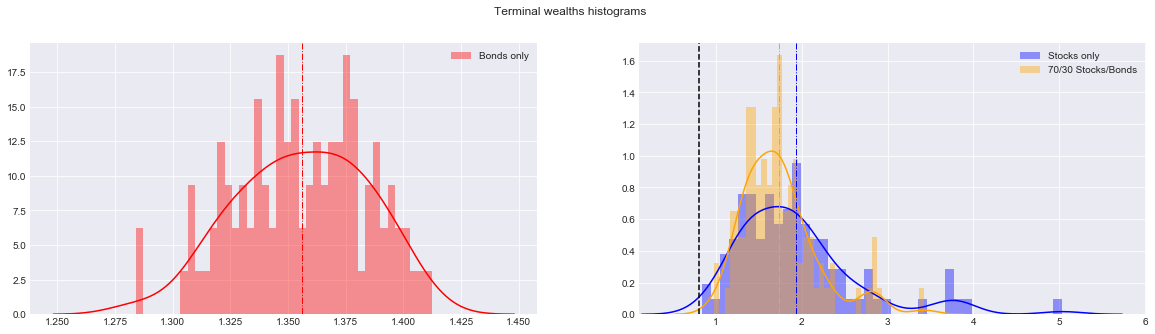

In [130]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot( erk.terminal_wealth(bond_rets), bins=40, color="red", label="Bonds only", ax=ax[0]) 
sns.distplot( erk.terminal_wealth(stock_rets), bins=40, color="blue", label="Stocks only", ax=ax[1])
sns.distplot( erk.terminal_wealth(stock_bond_rets), bins=40, color="orange", label="70/30 Stocks/Bonds", ax=ax[1])
plt.suptitle("Terminal wealths histograms")
ax[0].axvline( x=erk.terminal_wealth(bond_rets).mean(), linestyle="-.", color="red", linewidth=1)
ax[1].axvline( x=erk.terminal_wealth(stock_rets).mean(), linestyle="-.", color="blue", linewidth=1)
ax[1].axvline( x=erk.terminal_wealth(stock_bond_rets).mean(), linestyle="-.", color="orange", linewidth=1)
ax[1].axvline( x=floor, linestyle="--", color="k")
ax[1].set_xlim(left=0.1) 
ax[0].legend(), ax[0].grid()
ax[1].legend(), ax[1].grid()
plt.show()

In the plot above, we can see an histogram of the terminal wealths and visually see in the plot on the right 
that in both cases of simple PSP (stocks) and PSP/LHP (stocks/bond) **there may be** some terminal wealths that breach the given floor. 

## 7.2. Glide path weight allocation

Instead of using fixed weigth allocation throughout the entire life of the investment strategy, we can still use **a fixed weigthing allocation that, however, changes over time** and for example, rebalances the weights allocated to the PSP. 

For instance, we may start with a 80/20 allocation in stocks/bond and finishing with (i.e., at maturity) a 20/80 in stocks bond:

In [131]:
erk.ldi_glidepath_allocator(stock_rets, bond_rets, start=0.8, end=0.2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,...,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000
2,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,...,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421
3,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,...,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842
4,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,...,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263
5,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,...,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684
6,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,...,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105
7,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,...,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526
8,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,...,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947
9,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,...,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368
10,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,...,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789


In this case, our mixed PSP/HLP would have the following returns:

In [132]:
stock_bond_rets_glide = erk.ldi_mixer(stock_rets, bond_rets, allocator=erk.ldi_glidepath_allocator, start=0.8, end=0.2)
stock_bond_rets_glide.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,-0.041300,0.026573,0.049215,0.081259,0.009090,0.079926,-0.132304,0.039446,0.142621,-0.070588,...,-0.075809,0.001783,0.099275,-0.020509,0.129929,0.023416,0.072045,0.068038,-0.001508,0.140866
2,-0.012041,-0.003244,0.080577,0.002834,0.026202,-0.044274,0.019083,0.091215,-0.059483,0.084378,...,0.067791,-0.027852,0.043470,0.026269,0.021532,0.094854,-0.028936,-0.003464,0.085536,-0.009847
3,0.004991,-0.066219,0.038787,-0.029920,-0.048370,0.032847,0.113773,0.038597,-0.019121,0.009185,...,-0.033511,0.068473,0.054938,-0.012568,-0.031952,0.026445,0.047017,0.054376,0.081987,0.036857
4,0.046046,0.053162,-0.032772,0.055782,0.094130,-0.041357,0.023455,0.045602,0.026563,0.012917,...,-0.063204,0.018418,0.058835,0.022014,0.039744,0.056947,0.051943,0.085138,0.107397,-0.075085
5,0.029448,0.061587,0.011645,-0.004709,-0.003125,0.052179,0.036732,0.018927,0.109248,0.037086,...,0.082774,0.013690,0.023294,0.068302,0.036396,-0.036429,0.104505,0.049552,0.034494,0.061608


In [133]:
floor = 0.8
ldi_stats = pd.concat([
    erk.summary_stats_terminal(bond_rets, floor=floor, periods_per_year=periods_per_year, name="Bonds only"),
    erk.summary_stats_terminal(stock_rets, floor=floor, periods_per_year=periods_per_year, name="Stocks only"),
    erk.summary_stats_terminal(stock_bond_rets, floor=floor, periods_per_year=periods_per_year, name="70/30 Stocks/Bonds"),
    erk.summary_stats_terminal(stock_bond_rets_glide, floor=floor, periods_per_year=periods_per_year, name="Glide 80/20 Stocks/Bonds"),
], axis=1)
ldi_stats

,Bonds only,Stocks only,70/30 Stocks/Bonds,Glide 80/20 Stocks/Bonds
Mean ann. ret.,0.030895,0.062509,0.053947,0.048332
Mean wealth,1.355908,1.933813,1.735581,1.624041
Mean wealth std,0.028265,0.722882,0.440236,0.287269
Prob breach,0.000000,0.000000,0.000000,0.000000
Exp shortfall,0.000000,0.000000,0.000000,0.000000


We see that this way of becoming less aggressive as soon as we approach the maturity may eventually result in a better strategy as (on average) we have not reached the floor in change of a slightly less return (and terminal wealth). 

Note that, **if we rerun rates (for bond prices) and stocks prices, we would see different results** here$\dots$

## 7.3. Taking into account the floor

Now, we try to use a couple of allocators with try to take into account the floor value 
which we do not want to go below to. 

To this end, we again construct a mixed PSP/LHP strategy but instead of coupon-bearing bonds for the LHP we now use **zero-coupons bond** as proxy. 

In [134]:
n_scenarios      = 1000
n_years          = 10
mean_rate        = 0.03
# generate monthly data
periods_per_year = 12 

# simulate rates and zero-coupon prices
rates, zcb_price = erk.simulate_cir(n_years=n_years, n_scenarios=n_scenarios, a=0.05, b=mean_rate, 
                                    sigma=0.02, periods_per_year=periods_per_year)

# computes the ZCB returns 
zcb_rets = zcb_price.pct_change().dropna()

# simulate stock prices (and returns)
stock_price, stock_rets = erk.simulate_gbm_from_prices(n_years=n_years, n_scenarios=n_scenarios, 
                                                       mu=0.07, sigma=0.15, periods_per_year=periods_per_year)

Notice that **returns of the ZCBs can be simply computed by the percentage changes in price** as, differently by the coupon-bearing bond, the ZCBs do not pay coupons during their life.

Just to see how this works in this case, let us first build the **fixed 70/30 allocation** strategy:

In [135]:
w1 = 0.7
stock_zcb_rets = erk.ldi_mixer(stock_rets, zcb_rets, allocator=erk.ldi_fixed_allocator, w1=w1)

In [136]:
floor = 0.8
ldi_stats = pd.concat([
    erk.summary_stats_terminal(zcb_rets, floor=floor, periods_per_year=periods_per_year, name="ZCB only"),
    erk.summary_stats_terminal(stock_rets, floor=floor, periods_per_year=periods_per_year, name="Stocks only"),
    erk.summary_stats_terminal(stock_zcb_rets, floor=floor, periods_per_year=periods_per_year, name="70/30 Stocks/ZCB"),
], axis=1).round(4)
ldi_stats

,ZCB only,Stocks only,70/30 Stocks/ZCB
Mean ann. ret.,0.0300,0.0490,0.0455
Mean wealth,1.3433,1.7865,1.6395
Mean wealth std,0.0000,0.9274,0.5696
Prob breach,0.0000,0.0690,0.0170
Exp shortfall,0.0000,0.1349,0.1086


As expected, investing only in the ZCB would result in a small return but zero probability of breaching the floor. 
On the other hand, the PSP/LHP strategy increases the performance although there is a small probability of 
breaching the floor. 

## 7.4. Floor allocator

In what follows, we use an allocator that focuses on maximizing the performance of the PSP and, at the same time, 
takes into account the floor value. 

**The idea of such allocator is the same as the CPPI strategy** where 
a certain multiple of the cushion is only invested in the PSP. 
The cushion is computed by using a floor value which is nothing but that the floor (percentage) times the current price of the ZCB that is used for hedging. 
This way, we modulate the weight of allocation in the PSP (stocks) by investing a multiple of the ZCB bond price.

In [137]:
floor = 0.8

# given the same floor, change the multiplier m = 1,3,5
stock_zcb_floor_m1_rets = erk.ldi_mixer(stock_rets, zcb_rets, allocator=erk.ldi_floor_allocator, 
                                        zcb_price=zcb_price.loc[1:], floor=floor, m=1)
stock_zcb_floor_m3_rets = erk.ldi_mixer(stock_rets, zcb_rets, allocator=erk.ldi_floor_allocator, 
                                        zcb_price=zcb_price.loc[1:], floor=floor, m=3)
stock_zcb_floor_m5_rets = erk.ldi_mixer(stock_rets, zcb_rets, allocator=erk.ldi_floor_allocator, 
                                        zcb_price=zcb_price.loc[1:], floor=floor, m=5)

In [138]:
ldi_stats = pd.concat([
    ldi_stats,
    erk.summary_stats_terminal(stock_zcb_floor_m1_rets, floor=floor, periods_per_year=periods_per_year, name="Floor(0.8-1) Stocks/ZCB"),
    erk.summary_stats_terminal(stock_zcb_floor_m3_rets, floor=floor, periods_per_year=periods_per_year, name="Floor(0.8-3) Stocks/ZCB"),
    erk.summary_stats_terminal(stock_zcb_floor_m5_rets, floor=floor, periods_per_year=periods_per_year, name="Floor(0.8-5) Stocks/ZCB"),
], axis=1).round(4)
ldi_stats

,ZCB only,Stocks only,70/30 Stocks/ZCB,Floor(0.8-1) Stocks/ZCB,Floor(0.8-3) Stocks/ZCB,Floor(0.8-5) Stocks/ZCB
Mean ann. ret.,0.0300,0.0490,0.0455,0.0407,0.0475,0.0479
Mean wealth,1.3433,1.7865,1.6395,1.5247,1.7541,1.7674
Mean wealth std,0.0000,0.9274,0.5696,0.3748,0.9221,0.9314
Prob breach,0.0000,0.0690,0.0170,0.0000,0.0000,0.0000
Exp shortfall,0.0000,0.1349,0.1086,0.0000,0.0000,0.0000


We see that by changing the value of the multiplier $m$ ($m=1,3,5$) we obtain pretty good **strategies which maximize the performance of the PSP**, although, we see that with $m=5$ there is a probability of breaching the floor even if **very small**.

## 7.5. Drawdown allocator

Similarly to the floor allocator, which uses the ZCB price to take into account the floor, we can implement a **maximum drawdown allocator** which **dynamically changes the value of the floor** by looking at previous peaks. 
Recall that with a drawdown constrain we used to define **the multiplier of the cushion $m$ as $1/d$**, where $d$ is the maximum drawdown.

In [139]:
# use maxdd = 0.2
stock_zcb_dd_02_rets = erk.ldi_mixer(stock_rets, zcb_rets, allocator=erk.ldi_drawdown_allocator, maxdd=0.2)

In [140]:
# the floor, in case of the drawdown constraint, is given by 1 - maxdd
ldi_stats = pd.concat([
    ldi_stats,
    erk.summary_stats_terminal(stock_zcb_dd_02_rets, floor=1 - 0.2, periods_per_year=periods_per_year, name="DD(0.2) Stocks/ZCB"),
], axis=1).round(4)
ldi_stats

,ZCB only,Stocks only,70/30 Stocks/ZCB,Floor(0.8-1) Stocks/ZCB,Floor(0.8-3) Stocks/ZCB,Floor(0.8-5) Stocks/ZCB,DD(0.2) Stocks/ZCB
Mean ann. ret.,0.0300,0.0490,0.0455,0.0407,0.0475,0.0479,0.0438
Mean wealth,1.3433,1.7865,1.6395,1.5247,1.7541,1.7674,1.6306
Mean wealth std,0.0000,0.9274,0.5696,0.3748,0.9221,0.9314,0.6857
Prob breach,0.0000,0.0690,0.0170,0.0000,0.0000,0.0000,0.0000
Exp shortfall,0.0000,0.1349,0.1086,0.0000,0.0000,0.0000,0.0000


Instead of using the ZCB as safe asset (i.e., as LHP), we could in principle **invest in cash**. Suppose we have the following monthly cash returns:

In [141]:
ann_cashrate = 0.02
monthly_cashrets = (1 + ann_cashrate)**(1/12) - 1
cash_rets = pd.DataFrame(data=monthly_cashrets, index=stock_rets.index, columns=stock_rets.columns)

In [142]:
# define maxdd = 0.2
stock_cash_dd_02_rets = erk.ldi_mixer(stock_rets, cash_rets, allocator=erk.ldi_drawdown_allocator, maxdd=0.2)

In [143]:
# the floor, in case of the drawdown constraint, is given by 1 - maxdd
ldi_stats = pd.concat([
    ldi_stats,
    erk.summary_stats_terminal(stock_cash_dd_02_rets, floor=1 - 0.2, periods_per_year=periods_per_year, name="DD(0.2) Stocks/Cash"),
], axis=1).round(4)
ldi_stats

,ZCB only,Stocks only,70/30 Stocks/ZCB,Floor(0.8-1) Stocks/ZCB,Floor(0.8-3) Stocks/ZCB,Floor(0.8-5) Stocks/ZCB,DD(0.2) Stocks/ZCB,DD(0.2) Stocks/Cash
Mean ann. ret.,0.0300,0.0490,0.0455,0.0407,0.0475,0.0479,0.0438,0.0391
Mean wealth,1.3433,1.7865,1.6395,1.5247,1.7541,1.7674,1.6306,1.5603
Mean wealth std,0.0000,0.9274,0.5696,0.3748,0.9221,0.9314,0.6857,0.6666
Prob breach,0.0000,0.0690,0.0170,0.0000,0.0000,0.0000,0.0000,0.0000
Exp shortfall,0.0000,0.1349,0.1086,0.0000,0.0000,0.0000,0.0000,0.0000


We can verify whether the maximum drawdown constraint worked fine by computing the maximum drawdown across all scenarios and looking at the minimum. Since we impose a maximum drawdown of $20\%$, **we expect to see the minimim drawdown to be at most (or very close to) $-0.2$**: 

In [144]:
erk.summary_stats(stock_cash_dd_02_rets)["Max Drawdown"].min()

-0.1950296366108206

Look at histograms of the terminal wealths: 

In [145]:
tw_stock              = erk.terminal_wealth(stock_rets)
tw_stock_zcb          = erk.terminal_wealth(stock_zcb_rets)
tw_stock_zcb_floor_m1 = erk.terminal_wealth(stock_zcb_floor_m1_rets)
tw_stock_cash_dd_02   = erk.terminal_wealth(stock_cash_dd_02_rets)

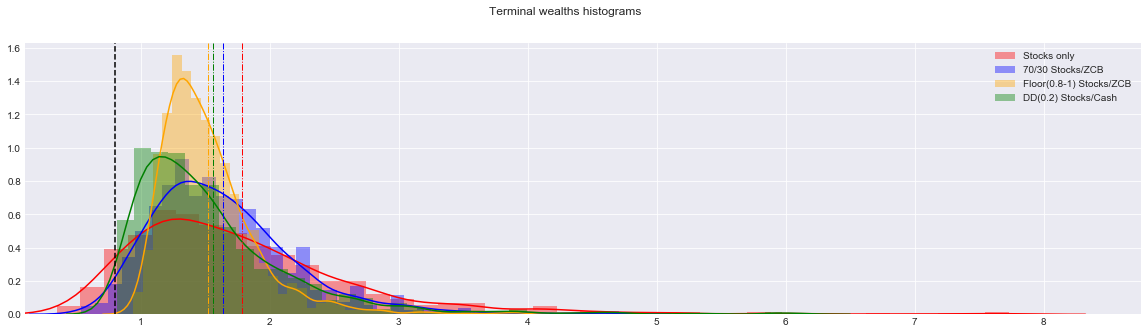

In [146]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.distplot( tw_stock, bins=40, color="red", label="Stocks only", ax=ax)
sns.distplot( tw_stock_zcb, bins=40, color="blue", label="70/30 Stocks/ZCB", ax=ax)
sns.distplot( tw_stock_zcb_floor_m1, bins=40, color="orange", label="Floor(0.8-1) Stocks/ZCB", ax=ax)
sns.distplot( tw_stock_cash_dd_02, bins=40, color="green", label="DD(0.2) Stocks/Cash", ax=ax)

plt.suptitle("Terminal wealths histograms")
ax.axvline( x=tw_stock.mean(), linestyle="-.", color="red", linewidth=1)
ax.axvline( x=tw_stock_zcb.mean(), linestyle="-.", color="blue", linewidth=1)
ax.axvline( x=tw_stock_zcb_floor_m1.mean(), linestyle="-.", color="orange", linewidth=1)
ax.axvline( x=tw_stock_cash_dd_02.mean(), linestyle="-.", color="green", linewidth=1)
ax.axvline( x=floor, linestyle="--", color="k")
ax.set_xlim(left=0.1) 
ax.legend(), ax.grid()
plt.show()

## 7.6. Backtesting Dynamic Strategies with Historical Data
We can apply the PSP/LHP strategy to **real world data** such as the **total market index returns** that we can get from our kit. 
In our example, this would represent the PSP (i.e. stocks) and let us use again cash for the LHP.

In [147]:
# get the total market returns
tmi_rets = erk.get_total_market_index_returns()["1990":]

# computing the drawdown and the peaks 
dd_tmi   = erk.drawdown(tmi_rets)

In [148]:
# Construct the LHP with cash return 
ann_cashrate = 0.03
monthly_cashrets = (1 + ann_cashrate)**(1/12) - 1
cash_rets = pd.DataFrame(data=monthly_cashrets, index=tmi_rets.index, columns=[0]) # we only have one scenario now!

In [149]:
# PSP/LHP Total Market/Cash strategy
tmi_cash_dd_02_rets = erk.ldi_mixer(pd.DataFrame(tmi_rets), cash_rets, allocator=erk.ldi_drawdown_allocator, maxdd=0.2)

# compute the drawdows and the peaks of the strategy 
dd_psp_lhp = erk.drawdown(tmi_cash_dd_02_rets[0])

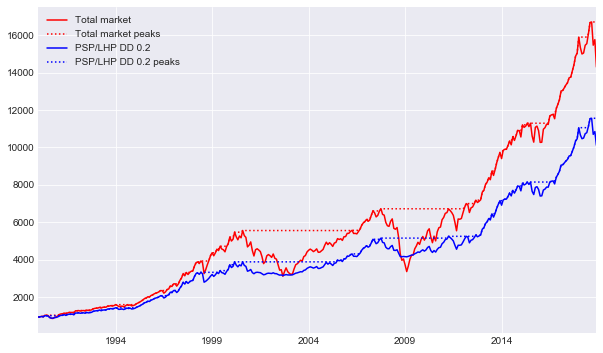

In [150]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
dd_tmi["Wealth"].plot(ax=ax, grid=True, color="red", label="Total market")
dd_tmi["Peaks"].plot(ax=ax, grid=True, ls=":", color="red", label="Total market peaks")
dd_psp_lhp["Wealth"].plot(ax=ax, grid=True, color="blue", label="PSP/LHP DD 0.2")
dd_psp_lhp["Peaks"].plot(ax=ax, grid=True, ls=":", color="blue", label="PSP/LHP DD 0.2 peaks")
plt.legend()
plt.show()

Let us see the stats of the investments:

In [151]:
invests = pd.concat([tmi_rets.rename("Tot. Market (PSP)"), 
                     cash_rets[0].rename("Cash (LHP)"), 
                     tmi_cash_dd_02_rets[0].rename("PSP/LHP(DD0.2)")], axis=1)

erk.summary_stats(invests, risk_free_rate=0, periods_per_year=12)

..\edhec_risk_kit.py:358: RuntimeWarning: divide by zero encountered in double_scalars
  return ann_ex_rets / ann_vol
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1533: RuntimeWarning: invalid value encountered in double_scalars
  lambda x: op(x, rvalues))


,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
Tot. Market (PSP),0.096058,0.145419,0.660558,-0.668827,4.247282,0.094633,0.066949,-0.499943
Cash (LHP),0.030000,0.000000,inf,NaN,NaN,NaN,NaN,0.000000
PSP/LHP(DD0.2),0.083038,0.100860,0.823297,-0.654863,4.948615,0.062031,0.044762,-0.194234


We see that with the PSP/LHP in Total Market/Cash strategy the 
maximum drawdown constraint has been satisfied (at most $19\%$ drawdown) although, of course, we have a slower growth in wealth. 